In [1]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

# Datasets

In [6]:
NUM_WORDS = 10000

In [7]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

17465344/17464789 [==============================] - 4s 0us/step


In [9]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    
    return results

In [10]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

# Baseline

In [11]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.5213 - accuracy: 0.8092 - binary_crossentropy: 0.5213 - val_loss: 0.3783 - val_accuracy: 0.8695 - val_binary_crossentropy: 0.3783
Epoch 2/20
25000/25000 - 1s - loss: 0.2799 - accuracy: 0.9061 - binary_crossentropy: 0.2799 - val_loss: 0.2911 - val_accuracy: 0.8864 - val_binary_crossentropy: 0.2911
Epoch 3/20
25000/25000 - 1s - loss: 0.2007 - accuracy: 0.9285 - binary_crossentropy: 0.2007 - val_loss: 0.2830 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2830
Epoch 4/20
25000/25000 - 1s - loss: 0.1618 - accuracy: 0.9439 - binary_crossentropy: 0.1618 - val_loss: 0.2981 - val_accuracy: 0.8824 - val_binary_crossentropy: 0.2981
Epoch 5/20
25000/25000 - 1s - loss: 0.1338 - accuracy: 0.9551 - binary_crossentropy: 0.1338 - val_loss: 0.3178 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3178
Epoch 6/20
25000

# Smaller

In [13]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [14]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6078 - accuracy: 0.7436 - binary_crossentropy: 0.6078 - val_loss: 0.4991 - val_accuracy: 0.8482 - val_binary_crossentropy: 0.4991
Epoch 2/20
25000/25000 - 1s - loss: 0.3904 - accuracy: 0.8807 - binary_crossentropy: 0.3904 - val_loss: 0.3571 - val_accuracy: 0.8768 - val_binary_crossentropy: 0.3571
Epoch 3/20
25000/25000 - 1s - loss: 0.2787 - accuracy: 0.9076 - binary_crossentropy: 0.2787 - val_loss: 0.3079 - val_accuracy: 0.8839 - val_binary_crossentropy: 0.3079
Epoch 4/20
25000/25000 - 1s - loss: 0.2252 - accuracy: 0.9244 - binary_crossentropy: 0.2252 - val_loss: 0.2889 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2889
Epoch 5/20
25000/25000 - 1s - loss: 0.1924 - accuracy: 0.9354 - binary_crossentropy: 0.1924 - val_loss: 0.2838 - val_accuracy: 0.8881 - val_binary_crossentropy: 0.2838
Epoch 6/20
25000/25000 - 1s - loss: 0.1699 - accuracy: 0.9434 - binary_crossentropy: 0.1699 - val_loss: 0.2854

# Bigger

In [15]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.3413 - accuracy: 0.8543 - binary_crossentropy: 0.3413 - val_loss: 0.2960 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.2960
Epoch 2/20
25000/25000 - 5s - loss: 0.1437 - accuracy: 0.9481 - binary_crossentropy: 0.1437 - val_loss: 0.3286 - val_accuracy: 0.8747 - val_binary_crossentropy: 0.3286
Epoch 3/20
25000/25000 - 5s - loss: 0.0482 - accuracy: 0.9862 - binary_crossentropy: 0.0482 - val_loss: 0.4615 - val_accuracy: 0.8681 - val_binary_crossentropy: 0.4615
Epoch 4/20
25000/25000 - 5s - loss: 0.0077 - accuracy: 0.9989 - binary_crossentropy: 0.0077 - val_loss: 0.5868 - val_accuracy: 0.8690 - val_binary_crossentropy: 0.5868
Epoch 5/20
25000/25000 - 5s - loss: 9.4058e-04 - accuracy: 1.0000 - binary_crossentropy: 9.4058e-04 - val_loss: 0.6707 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.6707
Epoch 6/20
25000/25000 - 5s - loss: 2.5077e-04 - accuracy: 1.0000 - binary_crossentropy: 2.5077e-04 - 

# Comparison

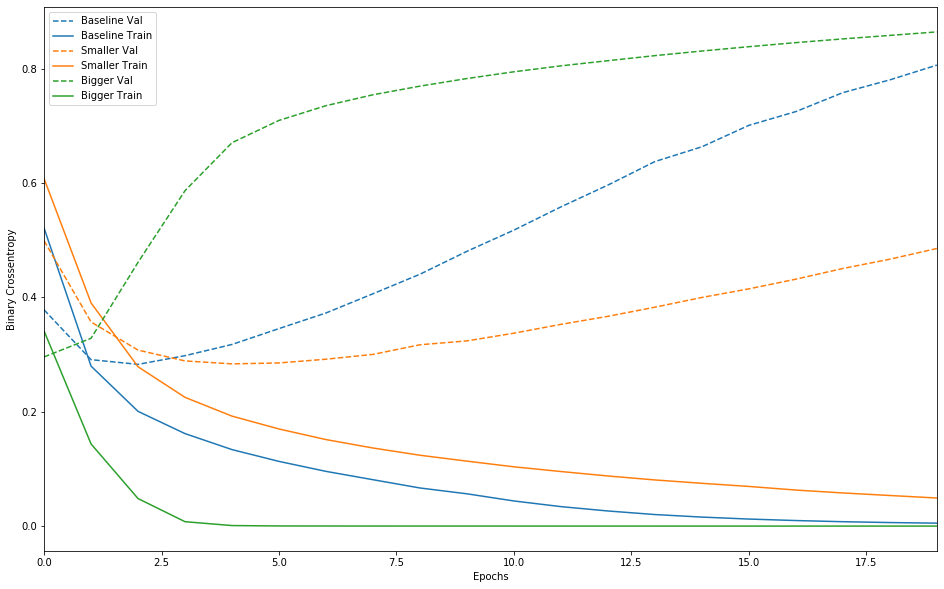

In [17]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

# Regularization

In [18]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [19]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.5198 - accuracy: 0.8138 - binary_crossentropy: 0.4769 - val_loss: 0.3812 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.3358
Epoch 2/20
25000/25000 - 2s - loss: 0.3071 - accuracy: 0.9070 - binary_crossentropy: 0.2576 - val_loss: 0.3390 - val_accuracy: 0.8873 - val_binary_crossentropy: 0.2867
Epoch 3/20
25000/25000 - 1s - loss: 0.2564 - accuracy: 0.9289 - binary_crossentropy: 0.2018 - val_loss: 0.3397 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2838
Epoch 4/20
25000/25000 - 2s - loss: 0.2344 - accuracy: 0.9386 - binary_crossentropy: 0.1769 - val_loss: 0.3556 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.2971
Epoch 5/20
25000/25000 - 2s - loss: 0.2177 - accuracy: 0.9461 - binary_crossentropy: 0.1583 - val_loss: 0.3680 - val_accuracy: 0.8775 - val_binary_crossentropy: 0.3079
Epoch 6/20
25000/25000 - 2s - loss: 0.2053 - accuracy: 0.9516 - binary_crossentropy: 0.1443 - val_loss: 0.3801

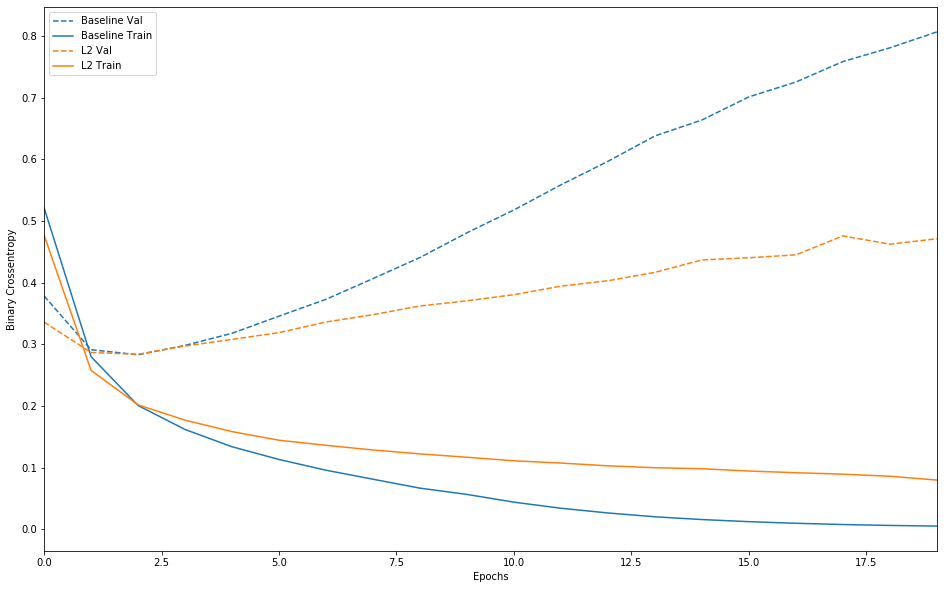

In [20]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

# Dropout

In [21]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [22]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6260 - accuracy: 0.6375 - binary_crossentropy: 0.6260 - val_loss: 0.4827 - val_accuracy: 0.8538 - val_binary_crossentropy: 0.4827
Epoch 2/20
25000/25000 - 2s - loss: 0.4642 - accuracy: 0.8013 - binary_crossentropy: 0.4642 - val_loss: 0.3473 - val_accuracy: 0.8806 - val_binary_crossentropy: 0.3473
Epoch 3/20
25000/25000 - 2s - loss: 0.3660 - accuracy: 0.8612 - binary_crossentropy: 0.3660 - val_loss: 0.2938 - val_accuracy: 0.8863 - val_binary_crossentropy: 0.2938
Epoch 4/20
25000/25000 - 1s - loss: 0.3095 - accuracy: 0.8906 - binary_crossentropy: 0.3095 - val_loss: 0.2784 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2784
Epoch 5/20
25000/25000 - 1s - loss: 0.2648 - accuracy: 0.9082 - binary_crossentropy: 0.2648 - val_loss: 0.2770 - val_accuracy: 0.8861 - val_binary_crossentropy: 0.2770
Epoch 6/20
25000/25000 - 1s - loss: 0.2334 - accuracy: 0.9192 - binary_crossentropy: 0.2334 - val_loss: 0.2837

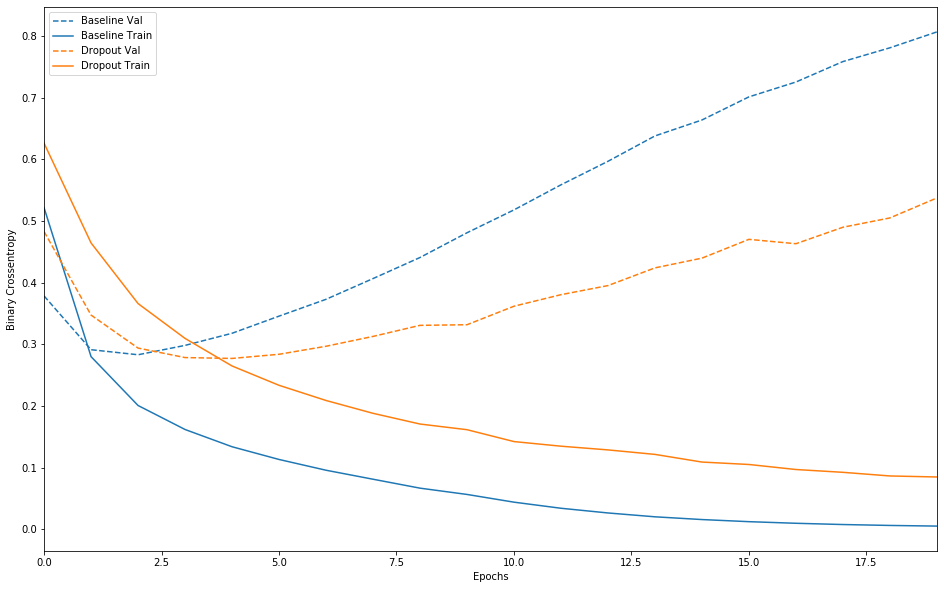

In [23]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])